# How to turn a covariance matrix into an ellipse

In [64]:
import numpy as np
import pylab
import scipy.stats

We'll start by generating *uncorrelated* normally-distributed data in d-dimensions, which will have a diagonal covariance matrix and whose confidence ellipse will be aligned with the coordinate axes. Then we'll apply a transformation of our choosing to turn this into correlated data with a generic covariance matrix, which we will then reverse-engineer.

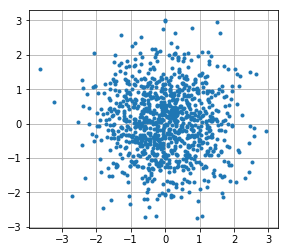

In [65]:
# Create uncorrelated random numbers.

d = 2       # Number of dimensions. Assumed to be 2 in much of what follows.
N = 1000    # Number of data points for numerical experiment.

x = np.random.normal(size=(d, N))

pylab.plot(x[0,:], x[1,:], '.')
pylab.grid(True)
pylab.gca().set_aspect('equal')

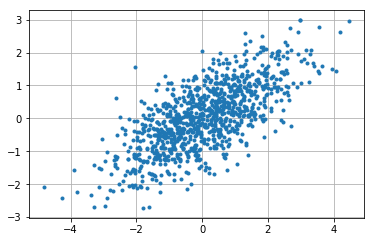

In [66]:
# Transform the data using y = Ax.

A = np.array([[1, 1], [0, 1]])   # Arbitrary linear transformation.
y = np.matmul(A, x)

pylab.plot(y[0,:], y[1,:], '.')
pylab.grid(True)
pylab.gca().set_aspect('equal')

In [67]:
# Check that covariance transforms like we expect, by computing the covariance
# of y directly, and by transforming x's covariance matrix.
Cyy = np.cov(y)
print Cyy

[[1.9030752  0.97345786]
 [0.97345786 0.99489656]]


In [68]:
np.matrix(A) * np.matrix(np.cov(x)) * np.matrix(A).T

matrix([[1.9030752 , 0.97345786],
        [0.97345786, 0.99489656]])

In [69]:
# Find the eigenvalues and eigenvectors of Cyy for use in diagonalization.
W, V = np.linalg.eig(Cyy)
print W
print V

[2.52314477 0.37482699]
[[ 0.84342736 -0.53724323]
 [ 0.53724323  0.84342736]]


In [70]:
np.matmul(V, np.matmul(np.diag(W), V.T))

array([[1.9030752 , 0.97345786],
       [0.97345786, 0.99489656]])

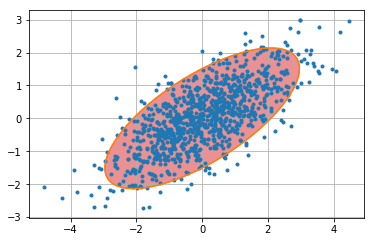

In [71]:
q = 0.90   # Fraction of points that should be inside the ellipse.

r_ci = scipy.stats.chi2.ppf(q, d, loc=0, scale=1)**0.5
rx, ry = r_ci * W ** 0.5

t = np.linspace(0.0, 2.0 * np.pi, 360)
v = np.array([rx * np.cos(t), ry * np.sin(t)])
v = np.matmul(V, v)
v = np.array(v)

pylab.gca().add_patch(
    matplotlib.patches.Ellipse((0.0, 0.0), width=2.0 * rx, height=2.0 * ry, 
                               angle=np.rad2deg(np.arctan2(V[1,0], V[0,0])), color='C3', alpha=0.5))
pylab.plot(y[0, :], y[1, :], '.')
pylab.plot(v[0, :], v[1, :])
pylab.grid(True)
pylab.gca().set_aspect('equal')
pylab.show()

In [75]:
print r_ci

2.145966026289347


In [72]:
# Count how many points are inside the ellipse


In [73]:
# Alternate method - use the implicit formula

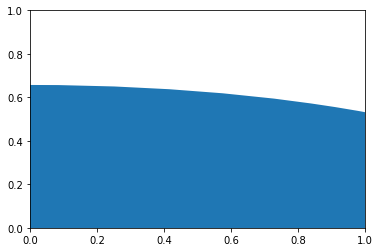

In [74]:
pylab.gca().add_patch(matplotlib.patches.Ellipse((0.0, 0.0), width=rx, height=ry))